In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1D

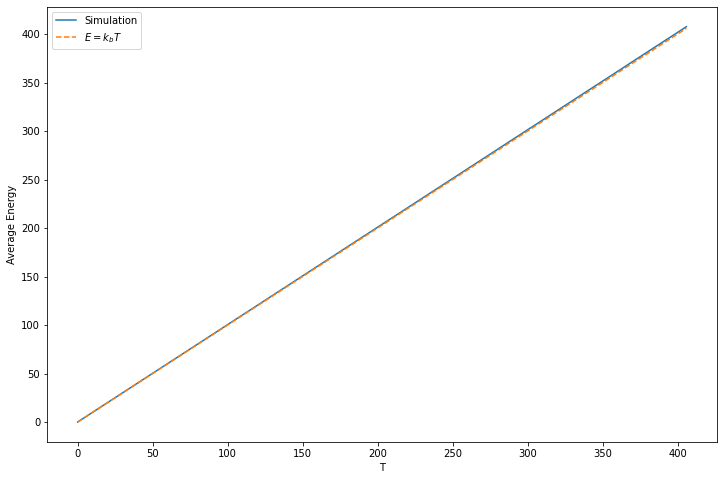

/tmp/ipykernel_161830/4089756693.py:69: RuntimeWarning: invalid value encountered in true_divide
  C = (E2 - E**2)/(Tt**2)


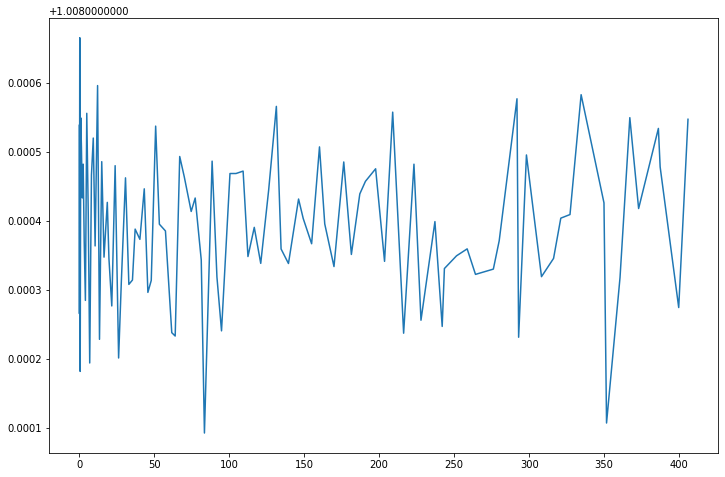

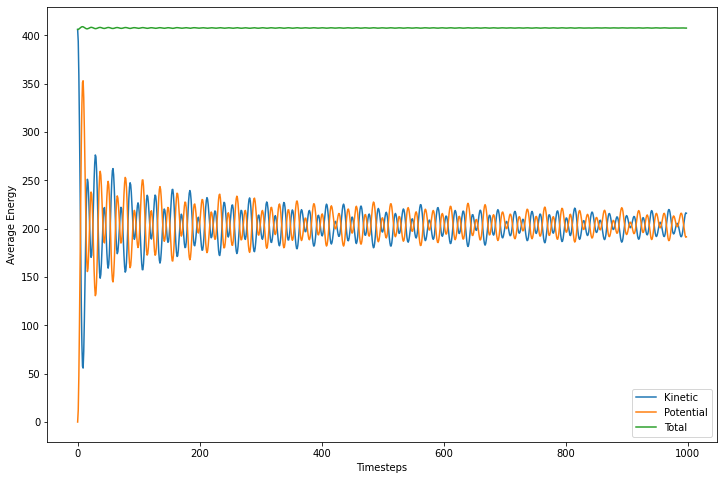

In [20]:
N = 10000
Nt = 1000
m = 1
k = 1
dt = 0.1
g = 1

Nl = 100

Tt = np.zeros(Nl, dtype = np.double)
E = np.zeros(Nl, dtype = np.double)
E2 = np.zeros(Nl, dtype = np.double)



pos = np.zeros(shape = (Nt,N) ,dtype = np.double)

for i,l in enumerate(range(Nl)):
        
    x = np.zeros( shape=(N), dtype = np.double)
    v = np.zeros(shape=(N), dtype = np.double)
    v = l*(np.random.rand(N) - 0.5)
    a = np.zeros(shape=(N), dtype = np.double)
    anew = np.copy(a)



    K = np.zeros(Nt-1, dtype = np.double)
    V = np.zeros(Nt-1, dtype = np.double)
    T = np.zeros(Nt-1, dtype = np.double)
    
    #pos[0] = np.copy(x)

    a[1:-1] = - g/m * x[1:-1]  + k/m * (x[2:] - 2*x[1:-1] +x[:-2] ) 
    a[0] = - g/m * x[0] + k/m * (x[1] - 2*x[0] +x[-1] ) 
    a[-1] = - g/m * x[-1] + k/m * (x[0] - 2*x[-1] +x[-2] ) 

    for j in range(Nt-1):

        K[j] = np.sum( 0.5*m*v**2) 
        V[j] = np.sum( 0.5*g*x**2) + 0.5*k*np.sum( (x[1:] - x[:-1])**2)

        x = x + v*dt + 0.5*a*dt**2    

        anew[1:-1] = - g/m * x[1:-1] + k/m * (x[2:] - 2*x[1:-1] +x[:-2] ) 
        anew[0] = - g/m * x[0] + k/m * (x[1] - 2*x[0] +x[-1] ) 
        anew[-1] = - g/m * x[-1] + k/m * (x[0] - 2*x[-1] +x[-2] ) 


        v = v + dt*(anew + a)/2

        a = np.copy(anew)

        T[j] = m*np.mean(v**2)
        #pos[j] = np.copy(x)

    Tt[i] = np.mean(T[100:])
    E[i] = np.mean((K+V)/N)
    E2[i] =  np.mean(((K+V)**2)/N)
    
plt.figure( figsize = (12,8))   
plt.plot(Tt,E, label = 'Simulation')
plt.plot(Tt,Tt,'--', label = '$E =  k_b T$')
plt.xlabel("T")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("harmonic_C.png", bbox_inches = "tight")
plt.show()
C = (E2 - E**2)/(Tt**2)
plt.figure( figsize = (12,8))   
plt.plot(Tt,C/N, label = 'Simulation')
plt.show()
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.xlabel("Timesteps")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("harmonic_energy.png", bbox_inches = "tight")
plt.show()

100%|██████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.49s/it]


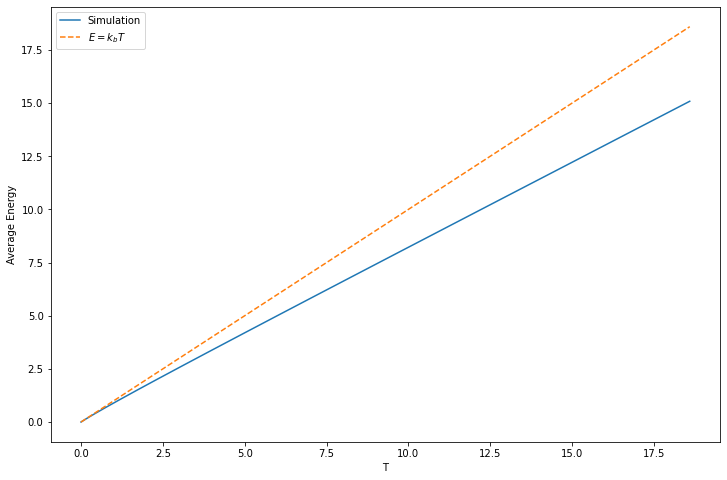

/tmp/ipykernel_161830/3493111746.py:70: RuntimeWarning: invalid value encountered in true_divide
  C = (E2 - E**2)/(Tt**2)


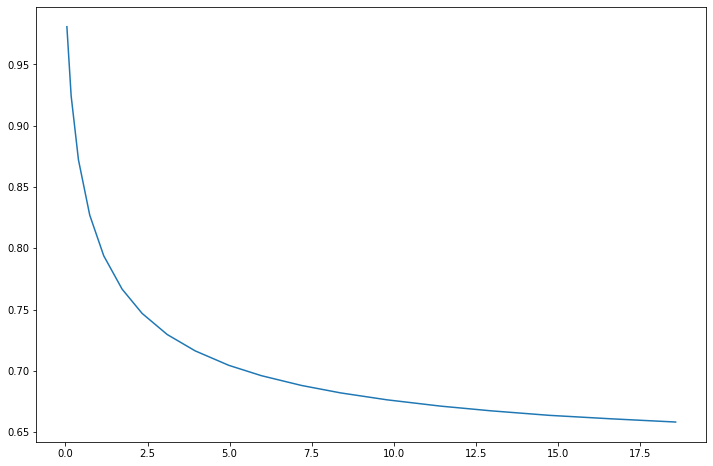

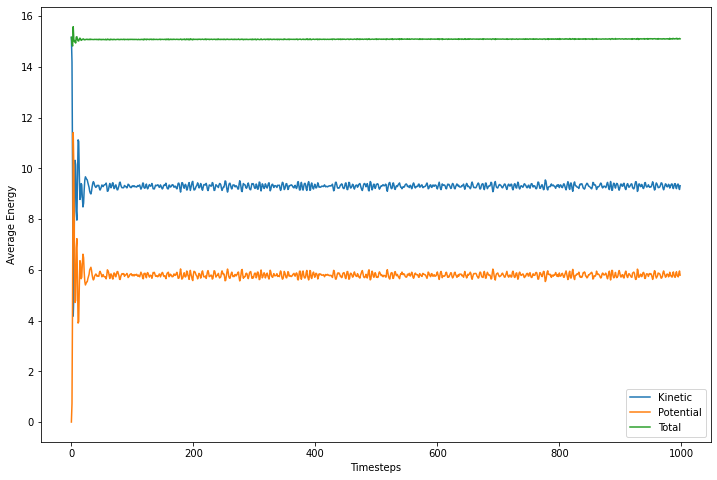

In [24]:
N = 10000
Nt = 1000
m = 1
b = 1
k = 1
dt = 0.1
g = 1

Nl = 20

Tt = np.zeros(Nl, dtype = np.double)
E = np.zeros(Nl, dtype = np.double)
E2 = np.zeros(Nl, dtype = np.double)

pos = np.zeros(shape = (Nt,N) ,dtype = np.double)

for i,l in enumerate(tqdm(range(Nl))):
        
    x = np.zeros( shape=(N), dtype = np.double)
    v = np.zeros(shape=(N), dtype = np.double)
    v = l*(np.random.rand(N) - 0.5)
    a = np.zeros(shape=(N), dtype = np.double)
    anew = np.copy(a)



    K = np.zeros(Nt-1, dtype = np.double)
    V = np.zeros(Nt-1, dtype = np.double)
    T = np.zeros(Nt-1, dtype = np.double)
    
    #pos[0] = np.copy(x)

    a[1:-1] = - g/m * x[1:-1] - b/m * x[1:-1]**3 + k/m * (x[2:] - 2*x[1:-1] +x[:-2] )  + g/m * ( (x[2:] - x[1:-1])**3 - (x[1:-1] - x[:-2])**3 )
    a[0] = - g/m * x[0] - b/m * x[0]**3 + k/m * (x[1] - 2*x[0] +x[-1] ) + g/m * ( (x[1] - x[0])**3 - (x[0] - x[-1])**3 )
    a[-1] = - g/m * x[-1] - b/m * x[-1]**3 +  k/m * (x[0] - 2*x[-1] +x[-2] ) + g/m * ( (x[0] - x[-1])**3 - (x[-1] - x[-2])**3 )

    for j in range(Nt-1):

        K[j] = np.sum( 0.5*m*v**2) 
        V[j] = np.sum( 0.5*g*x**2) + 0.25*b*np.sum(x**4) + 0.5*k*np.sum( (x[1:] - x[:-1])**2) + 0.25*g*np.sum( (x[1:] - x[:-1])**4 ) 

        x = x + v*dt + 0.5*a*dt**2    

        anew[1:-1] = - g/m * x[1:-1] - b/m * x[1:-1]**3 + k/m * (x[2:] - 2*x[1:-1] +x[:-2] )  + g/m * ( (x[2:] - x[1:-1])**3 - (x[1:-1] - x[:-2])**3 )
        anew[0] = - g/m * x[0] - b/m * x[0]**3 + k/m * (x[1] - 2*x[0] +x[-1] ) + g/m * ( (x[1] - x[0])**3 - (x[0] - x[-1])**3 )
        anew[-1] = - g/m * x[-1] - b/m * x[-1]**3 +  k/m * (x[0] - 2*x[-1] +x[-2] ) + g/m * ( (x[0] - x[-1])**3 - (x[-1] - x[-2])**3 )
 


        v = v + dt*(anew + a)/2

        a = np.copy(anew)

        T[j] = m*np.mean(v**2)
        #pos[j] = np.copy(x)

    Tt[i] = np.mean(T[100:])
    E[i] = np.mean((K+V)/N)
    E2[i] =  np.mean(((K+V)**2)/N)

    
plt.figure( figsize = (12,8))   
plt.plot(Tt,E, label = 'Simulation')
plt.plot(Tt,Tt,'--', label = '$E =  k_b T$')
plt.xlabel("T")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("anharmonic_C.png", bbox_inches = "tight")
plt.show()
C = (E2 - E**2)/(Tt**2)
plt.figure( figsize = (12,8))   

plt.plot(Tt,C/N, label = 'Simulation')
plt.show()
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.xlabel("Timesteps")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("anharmonic_energy.png", bbox_inches = "tight")
plt.show()

...........

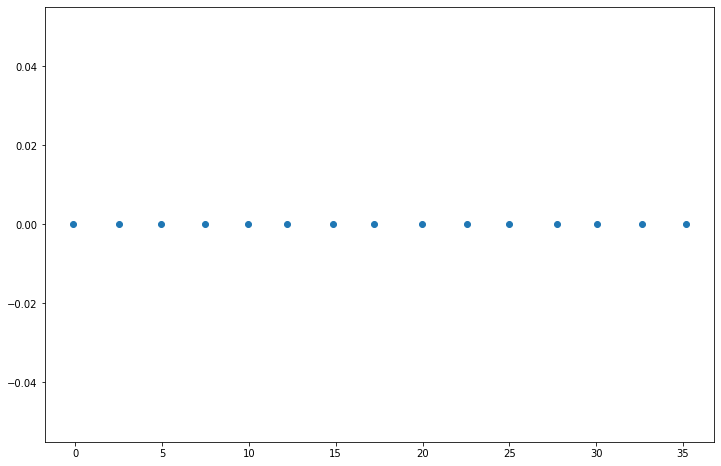

In [58]:
import matplotlib.animation as animation

fps = 30
nSeconds = 10

fig = plt.figure( figsize=(12,8) )
im = plt.scatter( 0.5*np.arange(N) + pos[0] , np.zeros(N))


def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_offsets( np.array([0.5*np.arange(N) + pos[i] , np.zeros(N)]).T )
    return [im]

anim = animation.FuncAnimation(fig,animate_func,frames = fps*nSeconds, interval = 1000 / fps)
anim.save('MD.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()

# 2D

In [35]:
Nx = 100
Ny = 100
N = Nx*Ny
Nt = 1000
m = 1
k = 1
dt = 0.1
g = 1

Nl = 20

Tt = np.zeros(Nl, dtype = np.double)
E = np.zeros(Nl, dtype = np.double)

pos = np.zeros(shape = (Nt,Nx,Ny) ,dtype = np.double)

for i,l in enumerate(range(Nl)):
        
    x = np.zeros( shape=(Nx,Ny), dtype = np.double)
    y = np.zeros( shape=(Nx,Ny), dtype = np.double)
    vx = np.zeros(shape=(Nx,Ny), dtype = np.double)
    vy = np.zeros(shape=(Nx,Ny), dtype = np.double)

    vx = l*(np.random.rand(Nx,Ny) - 0.5)
    vy = l*(np.random.rand(Nx,Ny) - 0.5)
  
    ax = np.zeros(shape=(Nx,Ny), dtype = np.double)
    ay = np.zeros(shape=(Nx,Ny), dtype = np.double)
 
    axnew = np.copy(ax)
    aynew = np.copy(ay)



    K = np.zeros(Nt-1, dtype = np.double)
    V = np.zeros(Nt-1, dtype = np.double)
    T = np.zeros(Nt-1, dtype = np.double)
    
    #pos[0,0,:] = np.copy(x)
    #pos[0,1,:] = np.copy(y)


    ax[: , 1:-1] = - g/m * x[:,1:-1]  + k/m * (x[:,2:] - 2*x[:,1:-1] +x[:,:-2] ) 
    ax[:,0] = - g/m * x[:,0] + k/m * (x[:,1] - 2*x[:,0] +x[:,-1] ) 
    ax[:,-1] = - g/m * x[:,-1] + k/m * (x[:,0] - 2*x[:,-1] +x[:,-2] ) 
    
    ay[1:-1, :] = - g/m * y[1:-1, :]  + k/m * (y[2:, :] - 2*y[1:-1, :] +y[:-2, :] ) 
    ay[0, :] = - g/m * y[0, :] + k/m * (y[1, :] - 2*y[0, :] +y[-1, :] ) 
    ay[-1, :] = - g/m * y[-1, :] + k/m * (y[0, :] - 2*y[-1, :] +y[-2, :] ) 
    
    for j in range(Nt-1):

        K[j] = np.sum( 0.5*m*(vx**2 + vy**2)) 
        V[j] = np.sum( 0.5*g*x**2) + 0.5*k*np.sum( (x[:,1:] - x[:,:-1])**2) + np.sum( 0.5*g*y**2) + 0.5*k*np.sum( (y[1:,:] - y[:-1,:])**2)

        x = x + vx*dt + 0.5*ax*dt**2    
        y = y + vy*dt + 0.5*ay*dt**2    
        
        axnew[: , 1:-1] = - g/m * x[:,1:-1]  + k/m * (x[:,2:] - 2*x[:,1:-1] +x[:,:-2] ) 
        axnew[:,0] = - g/m * x[:,0] + k/m * (x[:,1] - 2*x[:,0] +x[:,-1] ) 
        axnew[:,-1] = - g/m * x[:,-1] + k/m * (x[:,0] - 2*x[:,-1] +x[:,-2] ) 
    
        aynew[1:-1, :] = - g/m * y[1:-1, :]  + k/m * (y[2:, :] - 2*y[1:-1, :] +y[:-2, :] ) 
        aynew[0, :] = - g/m * y[0, :] + k/m * (y[1, :] - 2*y[0, :] +y[-1, :] ) 
        aynew[-1, :] = - g/m * y[-1, :] + k/m * (y[0, :] - 2*y[-1, :] +y[-2, :] ) 


        vx = vx + dt*(axnew + ax)/2
        vy = vy + dt*(aynew + ay)/2


        ax = np.copy(axnew)
        ay = np.copy(aynew)

        
        T[j] = 0.5*m*np.mean(vx**2 +vy**2)
        
        #pos[j,0,:] = np.copy(x)
        #pos[j,1,:] = np.copy(y)

    Tt[i] = np.mean(T[100:])
    E[i] = np.mean((K+V)/N)
'''    
plt.figure( figsize = (12,8))   
plt.plot(Tt,E, label = 'Simulation')
plt.plot(Tt,2*Tt,'--', label = 'Theory: $E = 2 k_b T$')
plt.legend()
plt.show()
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.legend()
plt.show()
'''

"    \nplt.figure( figsize = (12,8))   \nplt.plot(Tt,E, label = 'Simulation')\nplt.plot(Tt,2*Tt,'--', label = 'Theory: $E = 2 k_b T$')\nplt.legend()\nplt.show()\nplt.figure( figsize = (12,8))   \nplt.plot(K/N, label = 'Kinetic')\nplt.plot(V/N, label= 'Potential')\nplt.plot((K+V)/N , label = 'Total')\nplt.legend()\nplt.show()\n"

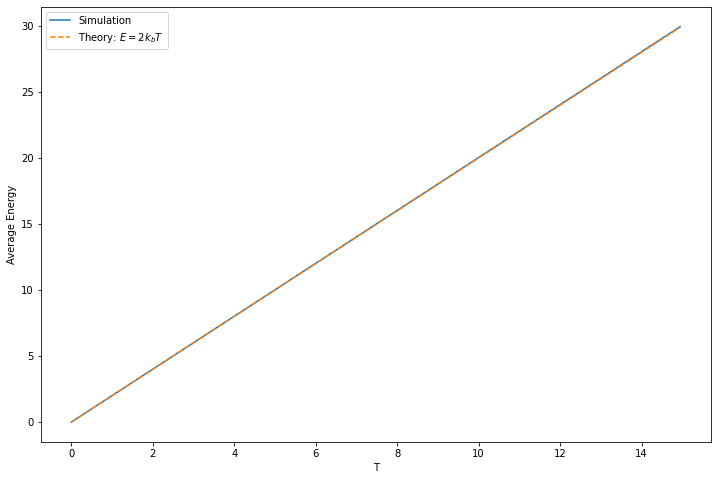

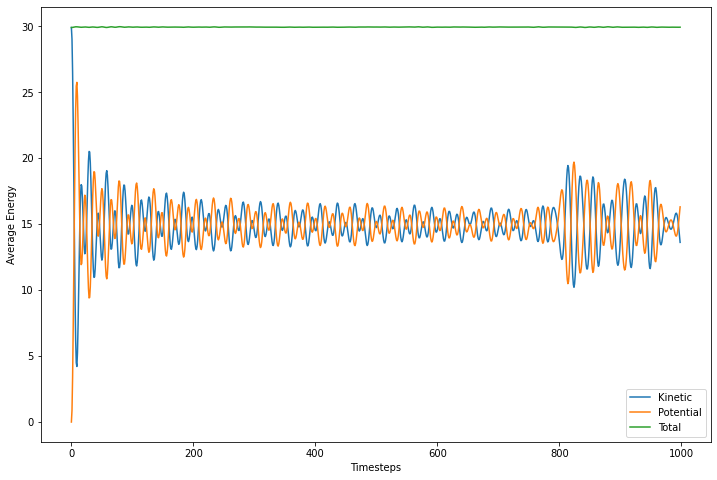

In [36]:
plt.figure( figsize = (12,8))   
plt.plot(Tt,E, label = 'Simulation')
plt.plot(Tt,2*Tt,'--', label = 'Theory: $E = 2 k_b T$')
plt.xlabel("T")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("2dharmonic_C.png", bbox_inches = "tight")
plt.show()
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.xlabel("Timesteps")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("2dharmonic_energy.png", bbox_inches = "tight")
plt.show()

In [2]:
%load_ext cython

In [89]:
%%cython
cimport cython

@cython.boundscheck(False) #unstable, causes random kernel crashes
@cython.wraparound(False)  #Same, probably 
def getaccel_and_pot(double[:,:] a, double[:,:] pos, double[:] mass, int N, double G, double softening):
    cdef int i = 0;
    cdef int j = 0;
    cdef double dx;
    cdef double dy;
    cdef double inv_r3;
    cdef double inv_r;
    cdef double pot = 0;
    for i in range(N):
        for j in range(N):
            if(i == j): continue
            dx = pos[j,0] - pos[i,0];
            dy = pos[j,1] - pos[i,1];
            #inv_r3 = inv_r**3
            inv_r3 = (dx**2 + dy**2  + softening**2)**(-1.5);
            a[i,0] +=  G * (dx * inv_r3) * mass[j];
            a[i,1] +=  G * (dy * inv_r3) * mass[j];
            inv_r = (dx**2 + dy**2 + softening**2 )**(-0.5);
            pot += -G*mass[i]*mass[j]*inv_r;
    pot *= 0.5;
    return pot


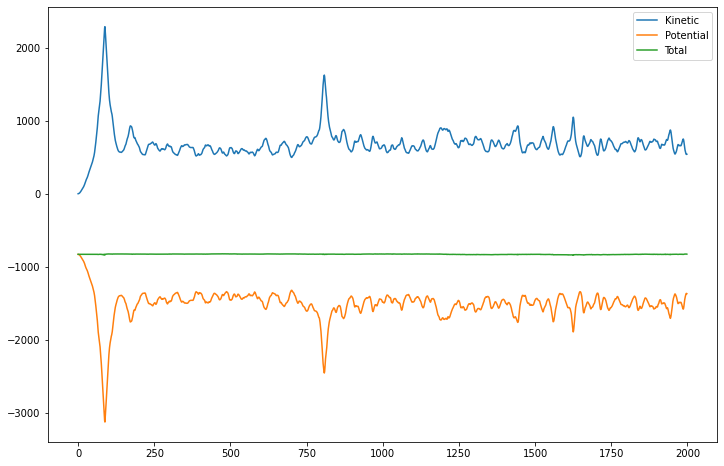

-2.2054818951249735


In [123]:
N = 150
Nt = 2000
m = 20*np.ones(shape = N )
dt = 0.1
G = 1

Nl = 2

softening = 2
#Tt = np.zeros(Nl, dtype = np.double)
#E = np.zeros(Nl, dtype = np.double)

pos = np.zeros(shape = (Nt,N,2) ,dtype = np.double)


for i,l in enumerate(range(Nl)):
    
    
    x = np.zeros( shape=(N,2), dtype = np.double)
    #x[:,0] = np.linspace(-50,50,N)
    #x[:,1] = 0
    v = np.zeros(shape=(N,2), dtype = np.double)

    x = 100*(np.random.rand(N,2) - 0.5)
    v = 0*(np.random.rand(N,2) - 0.5)
  
    a = np.zeros(shape=(N,2), dtype = np.double)
 
    anew = np.copy(a)

    K = np.zeros(Nt-1, dtype = np.double)
    V = np.zeros(Nt-1, dtype = np.double)
    #T = np.zeros(Nt-1, dtype = np.double)
    
    pos[0] = np.copy(x)
    

    K[0] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2)) 
    V[0] = getaccel_and_pot(a,x,m,N,G,softening)
    
    for j in range(Nt-1):
        #K[j] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2)) 

        x = x + v*dt + 0.5*a*dt**2       
        
        anew[:,:] = 0
        V[j] = getaccel_and_pot(anew,x,m,N,G,softening)

        
        v = v + dt*(anew + a)/2
        
        K[j] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2)) 


        a = np.copy(anew)

        
        #T[j] = 0.5*m*np.mean(v[:,0]**2 +v[:,1]**2)
        
        pos[j] = np.copy(x)

    #Tt[i] = np.mean(T[100:])
    #E[i] = np.mean((K+V)/N)
    
#plt.figure( figsize = (12,8))   
#plt.plot(Tt,E, label = 'Simulation')
#plt.plot(Tt,2*Tt,'--', label = 'Theory: $E = 2 k_b T$')
#plt.legend()
#plt.show()
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.legend()
plt.show()

print(  np.mean(V[int(0.6*Nt):]/N)/np.mean(K[int(0.6*Nt):]/N)  )    # U/T = -2 form virial theorem

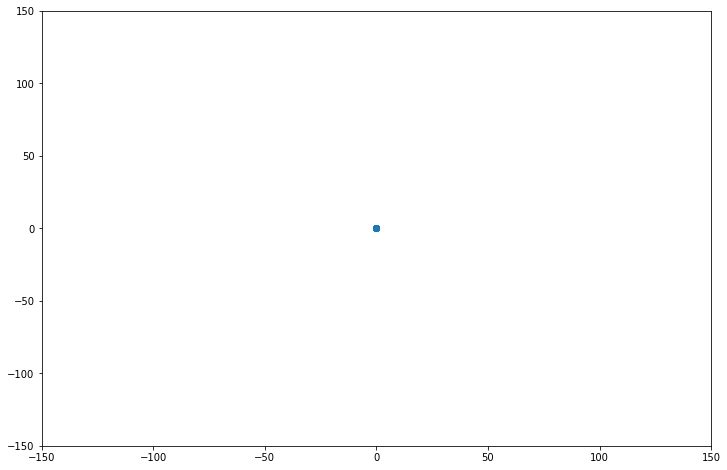

In [124]:
import matplotlib.animation as animation

fps = 30

fig = plt.figure( figsize=(12,8) )
im = plt.scatter( pos[0,:,0] , pos[0,:,1])
plt.xlim(-150,150)
plt.ylim(-150,150)


def animate_func(i):
    im.set_offsets(pos[i,:])
    return [im]

anim = animation.FuncAnimation(fig,animate_func,frames = Nt, interval = 1000 / fps)
anim.save('gravity3.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()

# Lennard Jones

In [3]:
%load_ext cython

In [4]:
%%cython
cimport cython

@cython.cdivision(True)
@cython.boundscheck(False) #unstable, causes random kernel crashes
@cython.wraparound(False)  #Same, probably 
def getaccel(double[:,:] a, double[:,:] v, double[:,:] pos, int N, double e, double ss):
    cdef int i = 0;
    cdef int j = 0;
    cdef double dx;
    cdef double dy;
    cdef double inv_r3;
    cdef double term;
    cdef double V = 0;
    #cdef double inv_r;
    #cdef double pot = 0;
    for i in range(N):
        for j in range(N):
            if(i == j): continue
            dx = pos[i,0] - pos[j,0];
            dy = pos[i,1] - pos[j,1];
            inv_r = (dx**2 + dy**2)**(-0.5);
            term = 24*e* inv_r**2 * (2*(ss*inv_r)**12 - (ss*inv_r)**6)
            a[i,0] += (term * dx);
            a[i,1] += (term * dy);
            V += 4*e*((ss*inv_r)**12 - (ss*inv_r)**6);
        #a[i,0] = a[i,0]/s**2 - (2/s)*vs*v[i,0]
        #a[i,1] = a[i,1]/s**2 - (2/s)*vs*v[i,1]
    V *= 0.5
    return V

In [38]:
N = 100
Nt = 1000
m = 1*np.ones(shape = N )
dt = 0.1
e = 10

Nl = 1000
l = np.linspace(0,10,Nl)


Tt = np.zeros(Nl, dtype = np.double)
E = np.zeros(Nl, dtype = np.double)

pos = np.zeros(shape = (Nt,N,2) ,dtype = np.double)


xx = np.linspace(-50, 50, int(np.sqrt(N)))
h = xx[1] - xx[0]
ss = h/(2**(1/6))
yy = np.linspace(-50, 50, int(np.sqrt(N)))
X,Y = np.meshgrid(xx,yy)
X = X.flatten()
Y = Y.flatten()


for i,l in enumerate(l):
        

    x = np.zeros( shape=(N,2), dtype = np.double)
    v = np.zeros(shape=(N,2), dtype = np.double)
       
    kb = 1


    #x = 100*l*(np.random.rand(N,2) - 0.5)
    x = np.array([X,Y]).T
    v = l*(np.random.rand(N,2) - 0.5)
  
    a = np.zeros(shape=(N,2), dtype = np.double)
 
    anew = np.copy(a)

    K = np.zeros(Nt-1, dtype = np.double)
    V = np.zeros(Nt-1, dtype = np.double)
    T = np.zeros(Nt-1, dtype = np.double)
    
    pos[0] = np.copy(x)
    

    K[0] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2))
    V[0] = getaccel(a,v,x,N,e,ss)
 

    for j in range(Nt-1):
        

        #K[j] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2)) 
        x = x + v*dt + 0.5*a*dt**2  
        
        anew[:,:] = 0
        V[j] = getaccel(anew,v,x,N,e,ss)

    
        v = v + dt*(anew + a)/2

        K[j] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2))


        a = np.copy(anew)
        T[j] = np.mean(m*(v[:,0]**2 +v[:,1]**2))

        pos[j] = np.copy(x)



    Tt[i] = np.mean(T[300:])
    E[i] = np.mean((K+V)/N)
    

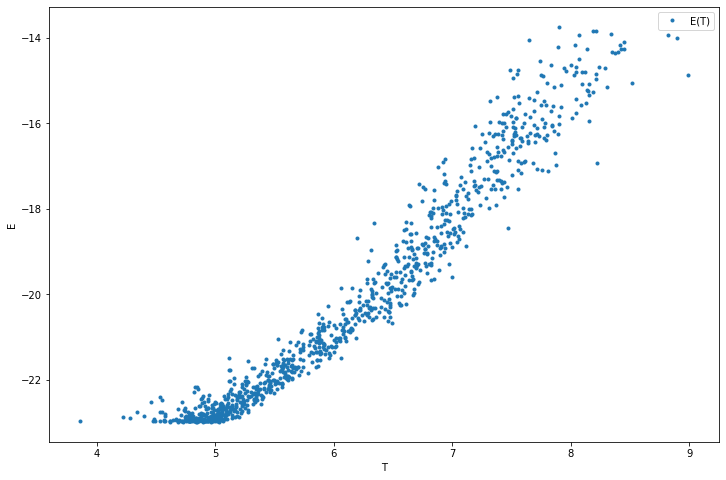

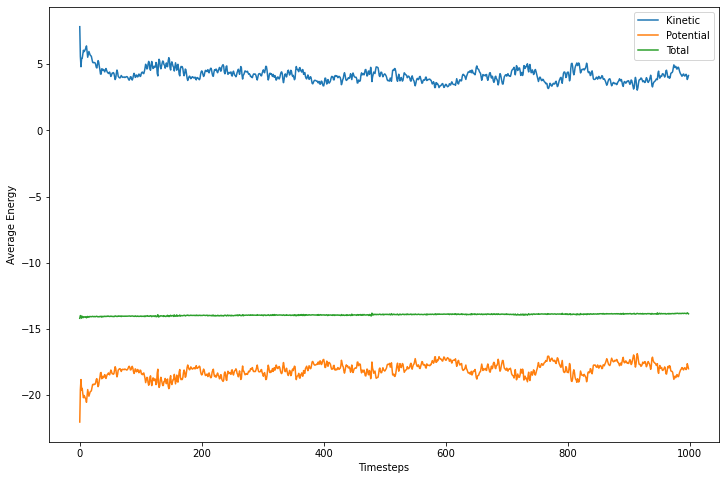

In [42]:
plt.figure( figsize = (12,8))   
plt.plot(Tt,E,'.',label = 'E(T)')
plt.xlabel("T")
plt.ylabel("E")
#plt.plot(Tt,Tt,'--', label = 'E = T')
plt.legend()
plt.savefig("LJ_C.png", bbox_inches = "tight")
plt.show()
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.xlabel("Timesteps")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("LJ_energy.png", bbox_inches = "tight")
plt.show()

...........

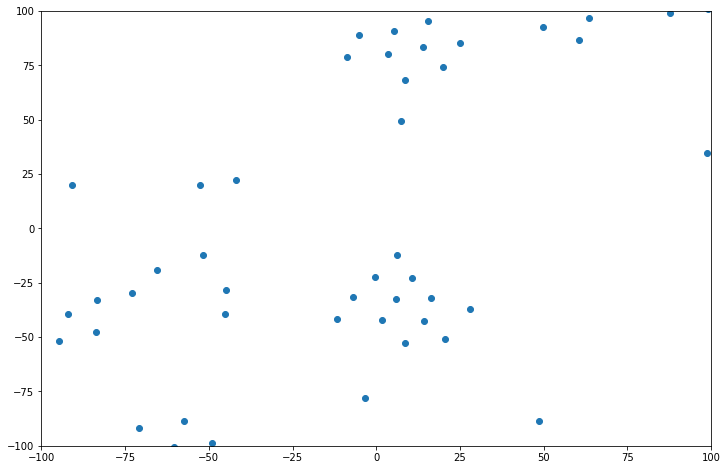

In [37]:
import matplotlib.animation as animation

fps = 30
nSeconds = 10

fig = plt.figure( figsize=(12,8) )
im = plt.scatter( pos[0,:,0] , pos[0,:,1])
plt.xlim(-100,100)
plt.ylim(-100,100)


def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_offsets(pos[i,:])
    return [im]

anim = animation.FuncAnimation(fig,animate_func,frames = fps*nSeconds, interval = 1000 / fps)
anim.save('LJ.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()

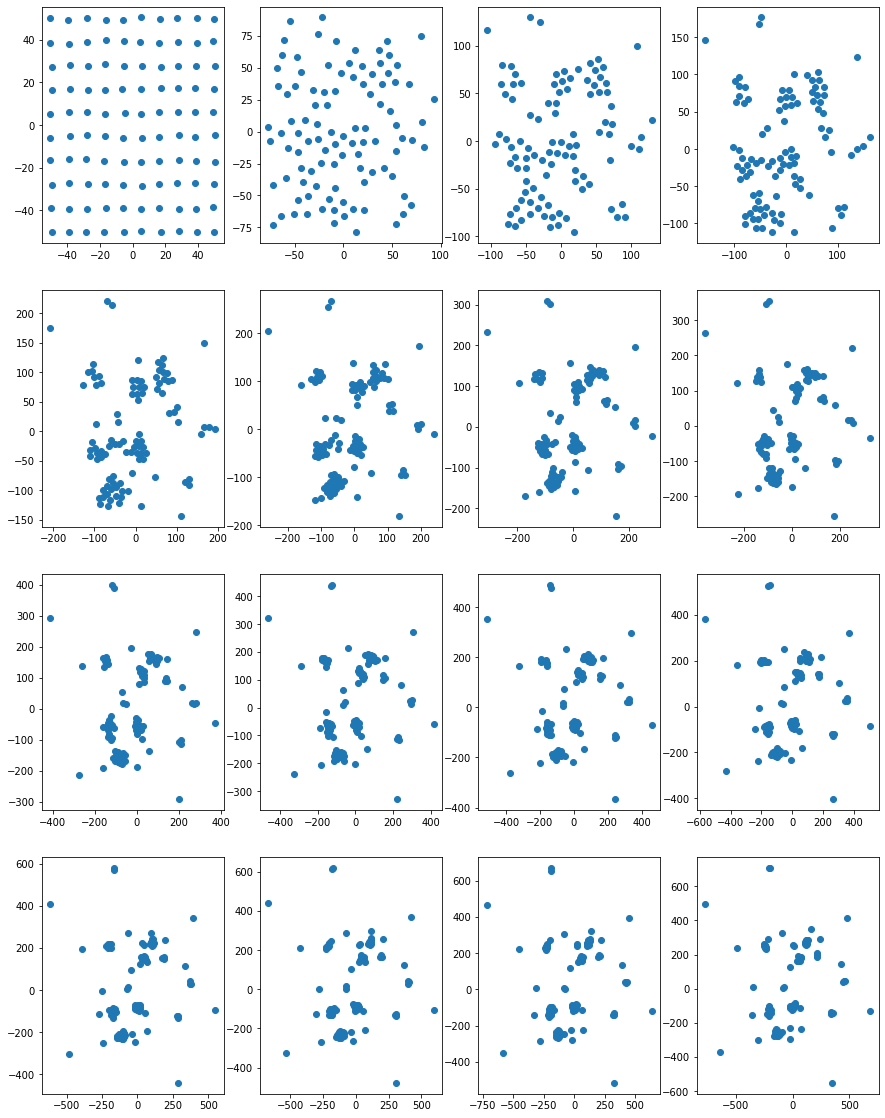

In [38]:
figure = plt.figure( figsize = (15,20))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.scatter( pos[int(i * Nt/16),:,0] , pos[int(i * Nt/16),:,1])
plt.savefig("LJ2.png", bbox_inches = "tight")
plt.show()


In [96]:
N = 400
Nt = 500
m = 1*np.ones(shape = N )
dt = 0.02
e = 10

Nl = 20
l = np.linspace(0,20,Nl)


Tt = np.zeros(Nl, dtype = np.double)
E = np.zeros(Nl, dtype = np.double)

pos = np.zeros(shape = (Nt,N,2) ,dtype = np.double)


xx = np.linspace(-L-10, L-10, int(np.sqrt(N)))
h = xx[1] - xx[0]
ss = h/(2**(1/6))
yy = np.linspace(-L-10, L-10, int(np.sqrt(N)))
X,Y = np.meshgrid(xx,yy)
X = X.flatten()
Y = Y.flatten()

L = 100

for i,l in tqdm(enumerate(l)):
        

    x = np.zeros( shape=(N,2), dtype = np.double)
    v = np.zeros(shape=(N,2), dtype = np.double)
       
    kb = 1


    #x = 100*l*(np.random.rand(N,2) - 0.5)
    x = np.array([X,Y]).T
    v = l*(np.random.rand(N,2) - 0.5)
  
    a = np.zeros(shape=(N,2), dtype = np.double)
 
    anew = np.copy(a)

    K = np.zeros(Nt-1, dtype = np.double)
    V = np.zeros(Nt-1, dtype = np.double)
    T = np.zeros(Nt-1, dtype = np.double)
    
    pos[0] = np.copy(x)
    

    K[0] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2))
    V[0] = getaccel(a,v,x,N,e,ss)
 

    for j in range(Nt-1):
        

        #K[j] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2)) 
        x = x + v*dt + 0.5*a*dt**2  
       

        
        anew[:,:] = 0
        V[j] = getaccel(anew,v,x,N,e,ss)

    
        v = v + dt*(anew + a)/2
        v[np.abs(x[:,0]) > L,0] *= -1
        v[np.abs(x[:,1]) > L,1] *= -1
        
        K[j] = np.sum( 0.5*m*(v[:,0]**2 + v[:,1]**2))


        a = np.copy(anew)
        T[j] = np.mean(m*(v[:,0]**2 +v[:,1]**2))

        pos[j] = np.copy(x)



    Tt[i] = np.mean(T[300:])
    E[i] = np.mean((K+V)/N)
    

20it [03:15,  9.77s/it]


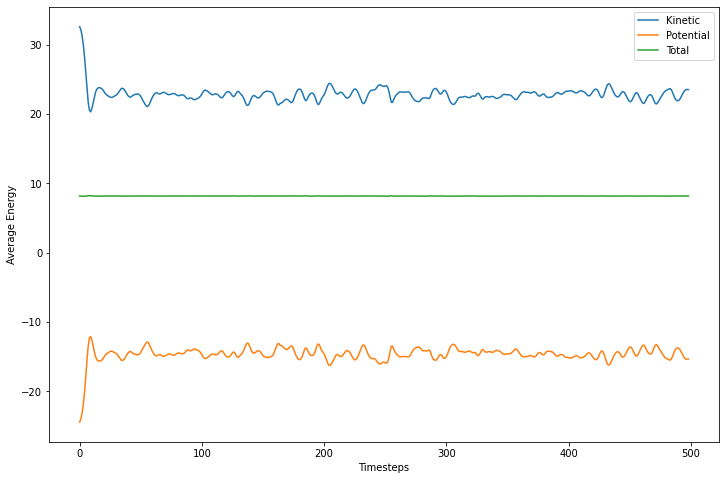

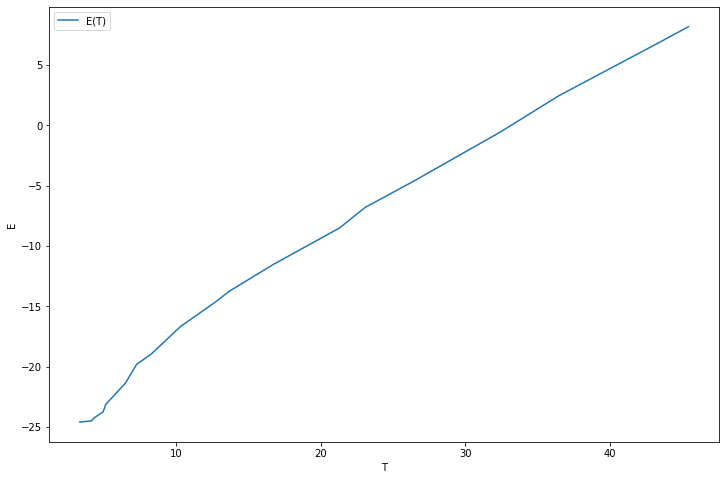

In [98]:
plt.figure( figsize = (12,8))   
plt.plot(K/N, label = 'Kinetic')
plt.plot(V/N, label= 'Potential')
plt.plot((K+V)/N , label = 'Total')
plt.xlabel("Timesteps")
plt.ylabel("Average Energy")
plt.legend()
plt.savefig("LJ_energy.png", bbox_inches = "tight")
plt.show()
plt.figure( figsize = (12,8))   
plt.plot(Tt,E,label = 'E(T)')
plt.xlabel("T")
plt.ylabel("E")
#plt.plot(Tt,Tt,'--', label = 'E = T')
plt.legend()
plt.savefig("LJ_C.png", bbox_inches = "tight")
plt.show()

..................

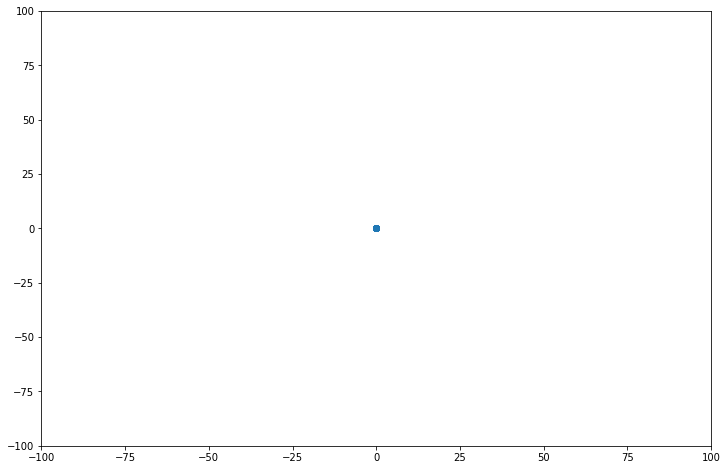

In [95]:
import matplotlib.animation as animation

fps = 30
nSeconds = 10

fig = plt.figure( figsize=(12,8) )
im = plt.scatter( pos[0,:,0] , pos[0,:,1])
plt.xlim(-L,L)
plt.ylim(-L,L)


def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_offsets(pos[i,:])
    return [im]

anim = animation.FuncAnimation(fig,animate_func,frames = Nt, interval = 1000 / fps)
anim.save('LJbound.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()